<a href="https://colab.research.google.com/github/NatthakanyaB/ADHD-Detector/blob/main/ADHD_Detector_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import tools and data splitting**

In [1]:
! pip install fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Moun

In [2]:
!pip install plotly

In [3]:
import shutil
from pathlib import Path

In [4]:
#Define source and destination folder paths
source_folder = 'gdrive/MyDrive/Dataset ADHD Detector (AIB)'  # Path to the folder you want to duplicate
destination_folder = 'alldatas'  # Path for the new duplicated folder

#Copy the entire folder
shutil.copytree(source_folder, destination_folder)

print(f"Folder duplicated from {source_folder} to {destination_folder}")


Folder duplicated from gdrive/MyDrive/Dataset ADHD Detector (AIB) to alldatas


In [5]:
import subprocess

In [6]:
from glob import glob
from PIL import Image

In [7]:
import pandas as pd
import numpy as np

# **Training**

In [8]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.15, seed=42),  # Or use GrandparentSplitter for a folder-based split
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)


### Axial

In [9]:
get_image_files("alldatas/trainaxial")

(#300) [Path('alldatas/trainaxial/ADHD/aa150.PNG'),Path('alldatas/trainaxial/ADHD/aa66.PNG'),Path('alldatas/trainaxial/ADHD/aa97.PNG'),Path('alldatas/trainaxial/ADHD/aa7.PNG'),Path('alldatas/trainaxial/ADHD/aa57.PNG'),Path('alldatas/trainaxial/ADHD/aa122.PNG'),Path('alldatas/trainaxial/ADHD/aa117.PNG'),Path('alldatas/trainaxial/ADHD/aa11.PNG'),Path('alldatas/trainaxial/ADHD/aa135.PNG'),Path('alldatas/trainaxial/ADHD/aa17.PNG')...]

In [10]:
dls = fields.dataloaders("alldatas/trainaxial")

In [11]:
dls.vocab

['ADHD', 'Normal']

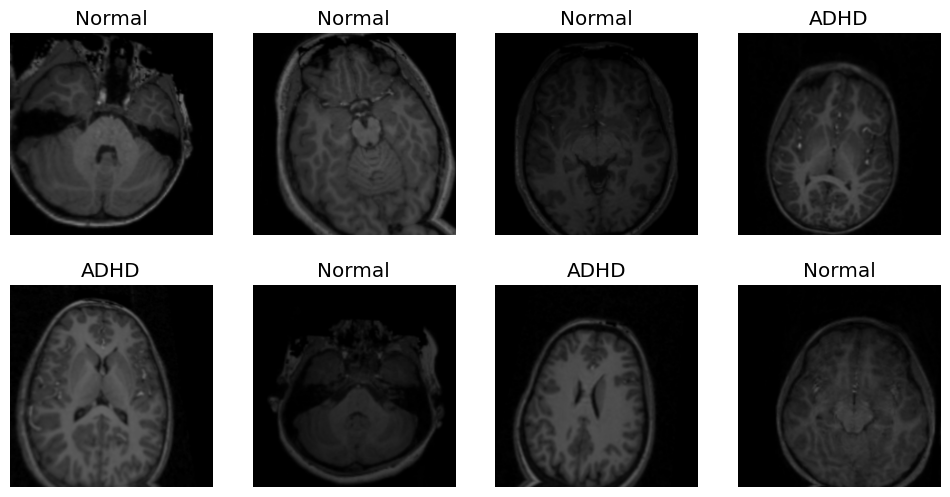

In [12]:
dls.train.show_batch(max_n=8, nrows=2)

In [13]:
learner = cnn_learner(dls, resnet50, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 207MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0012022644514217973)

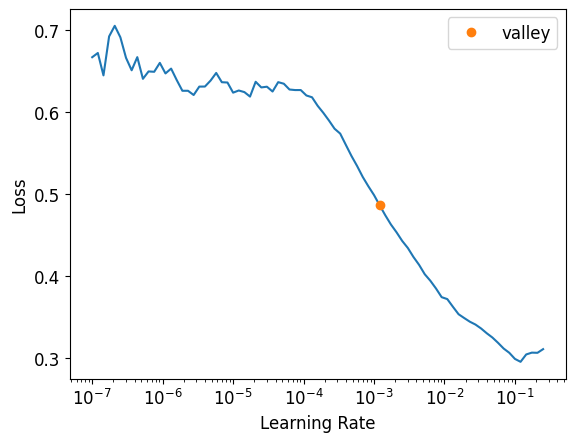

In [16]:
#learner.lr_find()

In [17]:
learner.fine_tune(epochs=30, freeze_epochs=1, base_lr=0.0012022644514217973)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.433987,0.746190,0.355556,0.644444,00:02


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.409139,0.586875,0.244444,0.755556,00:02
1,0.407664,0.578292,0.355556,0.644444,00:02
2,0.378937,0.575774,0.355556,0.644444,00:02
3,0.317421,0.613252,0.355556,0.644444,00:02
4,0.273317,0.535075,0.311111,0.688889,00:02
5,0.251769,0.473882,0.200000,0.800000,00:02
6,0.224514,0.381937,0.133333,0.866667,00:02
7,0.203649,0.341622,0.111111,0.888889,00:02
8,0.179508,0.349672,0.088889,0.911111,00:02
9,0.163483,0.366994,0.088889,0.911111,00:02


Plot graph: Train_loss vs Epochs


In [18]:
# Extract the losses from the recorder
train_losses = [row[0] for row in learner.recorder.values]
valid_losses = [row[1] for row in learner.recorder.values]

print("Training Losses:", train_losses)
print("Validation Losses:", valid_losses)

Training Losses: [0.4091391861438751, 0.4076635539531708, 0.3789365291595459, 0.3174208104610443, 0.27331700921058655, 0.2517692744731903, 0.22451360523700714, 0.20364859700202942, 0.1795080453157425, 0.1634833663702011, 0.15043914318084717, 0.14224591851234436, 0.12811918556690216, 0.11796879023313522, 0.10941261798143387, 0.1029873639345169, 0.09457754343748093, 0.09041273593902588, 0.08339294791221619, 0.0768190398812294, 0.07320810109376907, 0.07253281772136688, 0.067877396941185, 0.06659276783466339, 0.06404327601194382, 0.06293614953756332, 0.06006050109863281, 0.05837337300181389, 0.05589373782277107, 0.05241742730140686]
Validation Losses: [0.5868749022483826, 0.578292191028595, 0.5757741332054138, 0.6132521033287048, 0.5350752472877502, 0.473882257938385, 0.3819373548030853, 0.3416218161582947, 0.34967195987701416, 0.36699387431144714, 0.474624902009964, 0.5971428751945496, 1.0892386436462402, 1.6070094108581543, 1.9133522510528564, 1.9939780235290527, 1.718381643295288, 1.587

In [19]:
import plotly.graph_objects as go

# Example data for training loss (replace this with your actual data)
epochs = list(range(1, len(train_losses) + 1))  # Create epoch numbers

# Create a Plotly figure
fig = go.Figure()

# Add a line plot for training loss
fig.add_trace(go.Scatter(x=epochs, y=train_losses, mode='lines+markers', name='Training Loss'))

# Customize the layout
fig.update_layout(
    title="Training Loss vs Epochs",
    xaxis_title="Epochs",
    yaxis_title="Training Loss",
    template="plotly_dark"  # Use dark theme (optional)
)

# Show the figure
fig.show()


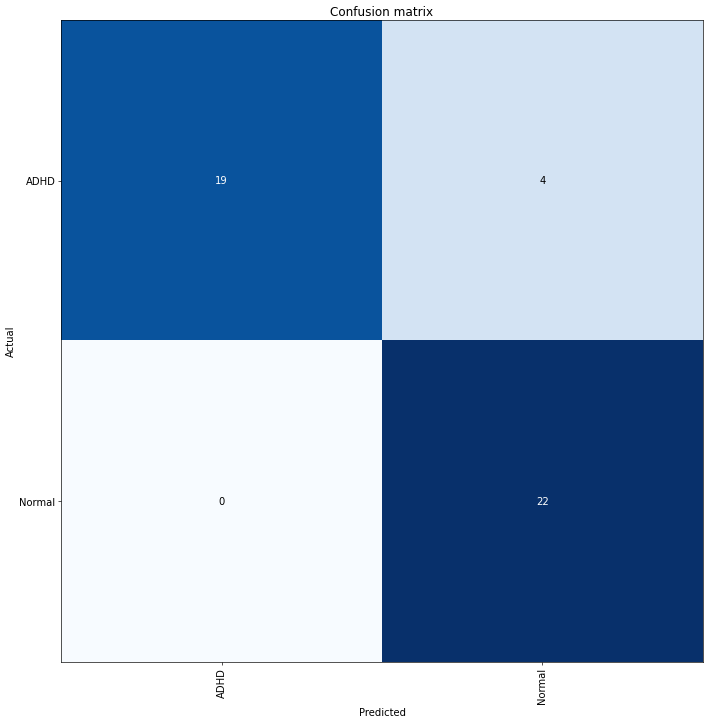

In [20]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=3)

[('ADHD', 'Normal', 4)]

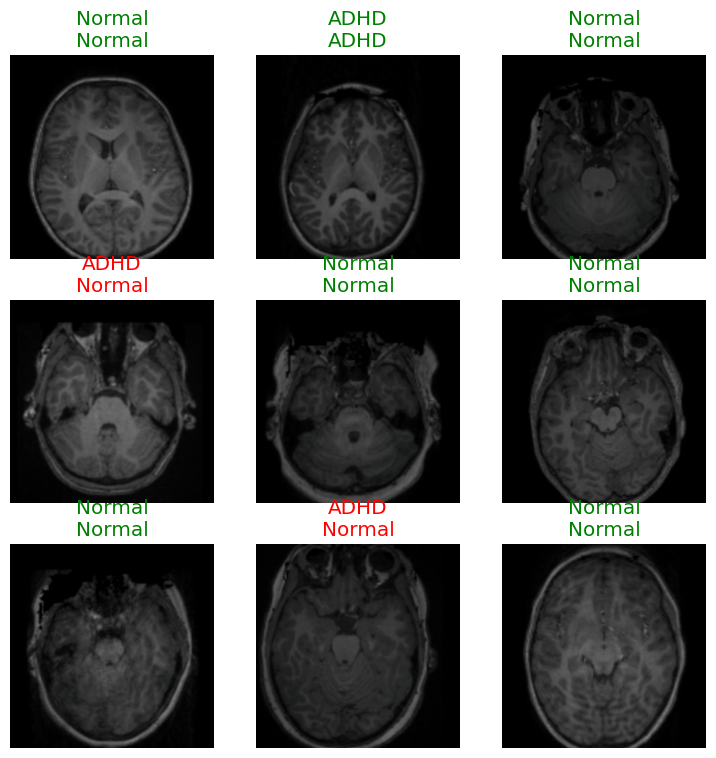

In [22]:
learner.show_results(shuffle=True)

In [23]:
learner.export("Axialfind_model_.pkl")

### Coronal

In [24]:
get_image_files("alldatas/traincoronal")

(#300) [Path('alldatas/traincoronal/ADHD/ac140.PNG'),Path('alldatas/traincoronal/ADHD/ac141.PNG'),Path('alldatas/traincoronal/ADHD/ac48.PNG'),Path('alldatas/traincoronal/ADHD/ac104.PNG'),Path('alldatas/traincoronal/ADHD/ac45.PNG'),Path('alldatas/traincoronal/ADHD/ac79.PNG'),Path('alldatas/traincoronal/ADHD/ac22.PNG'),Path('alldatas/traincoronal/ADHD/ac111.PNG'),Path('alldatas/traincoronal/ADHD/ac148.PNG'),Path('alldatas/traincoronal/ADHD/ac15.PNG')...]

In [25]:
dls = fields.dataloaders("alldatas/traincoronal")

In [26]:
dls.vocab

['ADHD', 'Normal']

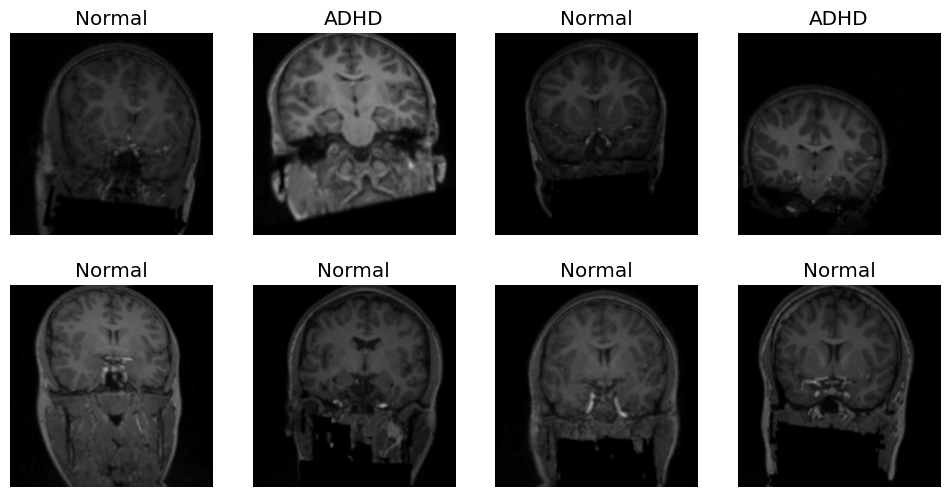

In [27]:
dls.train.show_batch(max_n=8, nrows=2)

In [28]:
learner = cnn_learner(dls, resnet50, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning:

`cnn_learner` has been renamed to `vision_learner` -- please update your code



/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



SuggestedLRs(valley=0.001737800776027143)

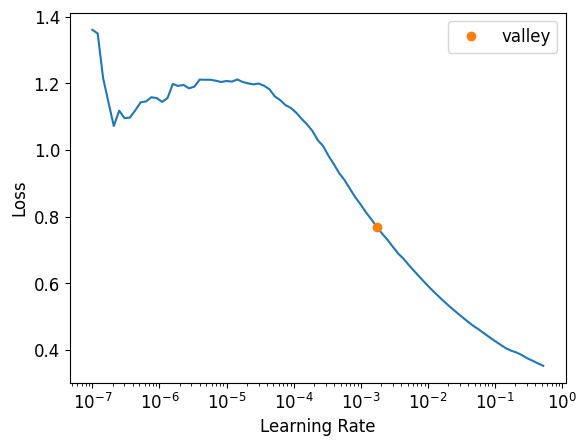

In [29]:
#learner.lr_find()

In [30]:
learner.fine_tune(epochs= 28 , freeze_epochs=1, base_lr=0.001737800776027143)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.021370,0.842548,0.400000,0.600000,00:02


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.261222,0.693220,0.333333,0.666667,00:02
1,0.219269,0.670233,0.333333,0.666667,00:02
2,0.195325,0.554042,0.288889,0.711111,00:02
3,0.177580,0.588034,0.288889,0.711111,00:02
4,0.152117,0.535877,0.244444,0.755556,00:02
5,0.146827,0.404595,0.155556,0.844444,00:02
6,0.133805,0.283741,0.111111,0.888889,00:02
7,0.119835,0.214913,0.044444,0.955556,00:02
8,0.104111,0.249719,0.111111,0.888889,00:02
9,0.095990,0.363500,0.155556,0.844444,00:02


Plot graph: Train_loss vs Epochs


In [31]:
# Extract the losses from the recorder
train_losses = [row[0] for row in learner.recorder.values]
valid_losses = [row[1] for row in learner.recorder.values]

print("Training Losses:", train_losses)
print("Validation Losses:", valid_losses)

Training Losses: [0.26122161746025085, 0.219268798828125, 0.19532510638237, 0.17758001387119293, 0.15211744606494904, 0.14682713150978088, 0.13380549848079681, 0.1198352724313736, 0.10411079972982407, 0.09599021822214127, 0.0849691703915596, 0.07929970324039459, 0.07520315796136856, 0.06765194237232208, 0.06152768433094025, 0.056508585810661316, 0.05140399932861328, 0.047052402049303055, 0.04403897374868393, 0.04040348902344704, 0.03826261684298515, 0.035296663641929626, 0.03256092220544815, 0.033679913729429245, 0.03154163062572479, 0.029539942741394043, 0.027549730613827705, 0.026073696091771126]
Validation Losses: [0.6932204961776733, 0.6702326536178589, 0.5540419816970825, 0.5880337357521057, 0.5358765721321106, 0.4045950472354889, 0.2837412357330322, 0.21491345763206482, 0.24971887469291687, 0.36350005865097046, 0.47804147005081177, 0.5262766480445862, 0.5510205030441284, 0.5850580334663391, 0.6698042750358582, 0.6474453210830688, 0.6243378520011902, 0.5786631107330322, 0.60564148

In [32]:
import plotly.graph_objects as go

epochs = list(range(1, len(train_losses) + 1))  # Create epoch numbers

# Create a Plotly figure
fig = go.Figure()

# Add a line plot for training loss
fig.add_trace(go.Scatter(x=epochs, y=train_losses, mode='lines+markers', name='Training Loss'))

# Customize the layout
fig.update_layout(
    title="Training Loss vs Epochs",
    xaxis_title="Epochs",
    yaxis_title="Training Loss",
    template="plotly_dark"  # Use dark theme (optional)
)

# Show the figure
fig.show()

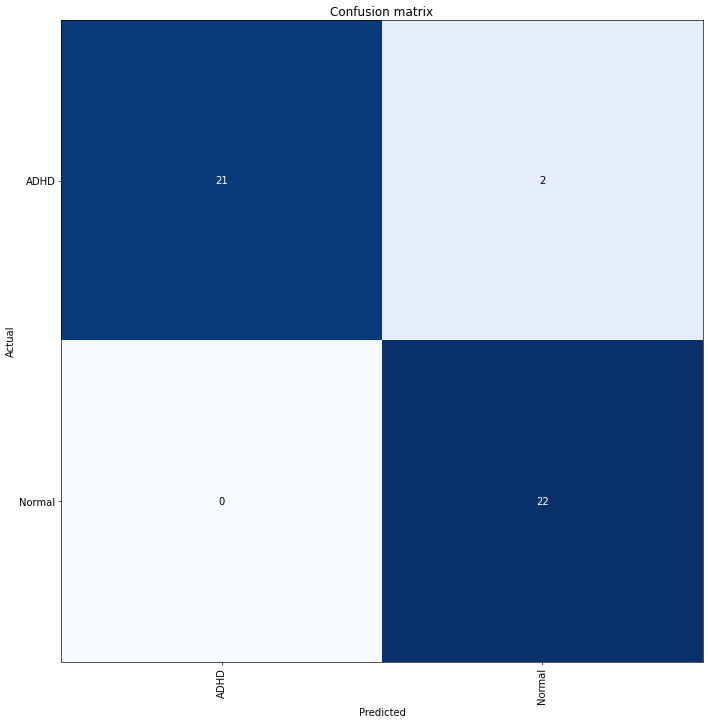

In [33]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [34]:
interp.most_confused(min_val=3)

[]

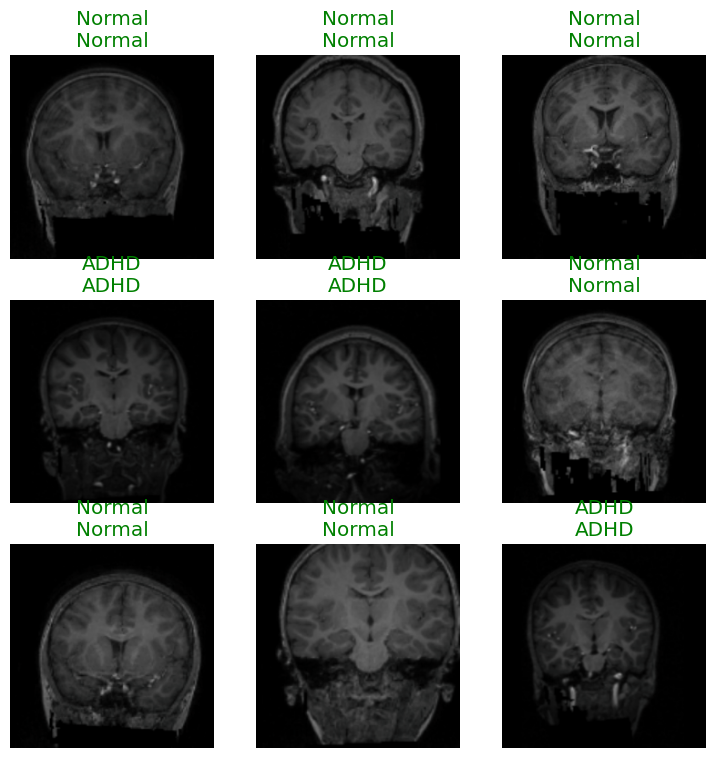

In [35]:
learner.show_results(shuffle=True)

In [36]:
learner.export("Coronalfind_model_.pkl")

### Sagittal

In [37]:
get_image_files("alldatas/trainsagittal")

(#300) [Path('alldatas/trainsagittal/ADHD/as116.PNG'),Path('alldatas/trainsagittal/ADHD/as9.PNG'),Path('alldatas/trainsagittal/ADHD/as127.PNG'),Path('alldatas/trainsagittal/ADHD/as89.PNG'),Path('alldatas/trainsagittal/ADHD/as95.PNG'),Path('alldatas/trainsagittal/ADHD/as134.PNG'),Path('alldatas/trainsagittal/ADHD/as103.PNG'),Path('alldatas/trainsagittal/ADHD/as64.PNG'),Path('alldatas/trainsagittal/ADHD/as62.PNG'),Path('alldatas/trainsagittal/ADHD/as43.PNG')...]

In [38]:
dls = fields.dataloaders("alldatas/trainsagittal")

In [39]:
dls.vocab

['ADHD', 'Normal']

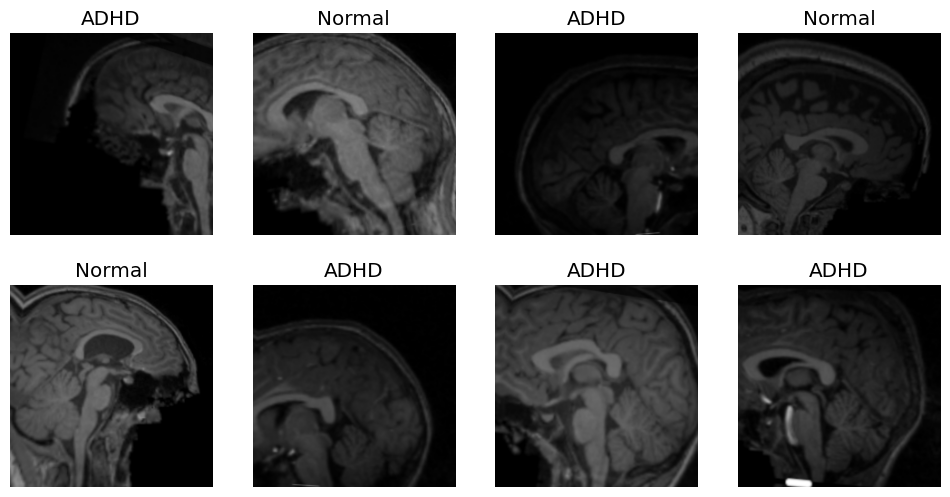

In [40]:
dls.train.show_batch(max_n=8, nrows=2)

In [41]:
learner = cnn_learner(dls, resnet50, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning:

`cnn_learner` has been renamed to `vision_learner` -- please update your code



/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



SuggestedLRs(valley=0.001737800776027143)

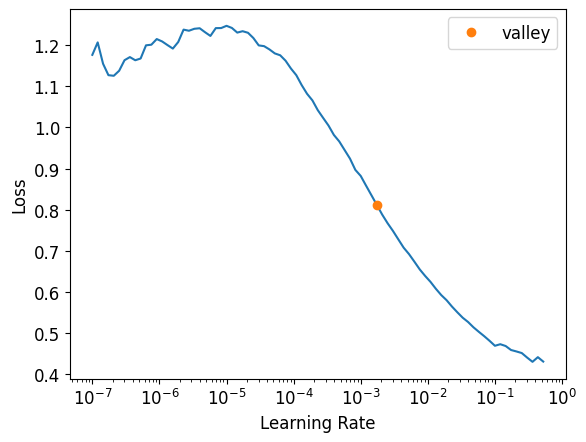

In [42]:
#learner.lr_find()

In [43]:
learner.fine_tune(epochs= 30, freeze_epochs=1, base_lr=0.001737800776027143)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.910079,0.659668,0.355556,0.644444,00:02


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.393377,0.491204,0.200000,0.800000,00:02
1,0.400339,0.507393,0.222222,0.777778,00:02
2,0.345682,0.547481,0.288889,0.711111,00:02
3,0.300523,0.580583,0.311111,0.688889,00:02
4,0.264918,0.486437,0.266667,0.733333,00:02
5,0.234555,0.348571,0.244444,0.755556,00:02
6,0.212180,0.208050,0.088889,0.911111,00:02
7,0.191105,0.158613,0.022222,0.977778,00:02
8,0.171404,0.203939,0.088889,0.911111,00:02
9,0.154218,0.207717,0.111111,0.888889,00:02


Plot graph: Train_loss vs Epochs


In [44]:
# Extract the losses from the recorder
train_losses = [row[0] for row in learner.recorder.values]
valid_losses = [row[1] for row in learner.recorder.values]

print("Training Losses:", train_losses)
print("Validation Losses:", valid_losses)

Training Losses: [0.39337724447250366, 0.40033870935440063, 0.3456815779209137, 0.300523042678833, 0.2649178206920624, 0.23455531895160675, 0.2121797800064087, 0.19110549986362457, 0.17140425741672516, 0.15421774983406067, 0.14809761941432953, 0.14454258978366852, 0.13852383196353912, 0.131156325340271, 0.12431739270687103, 0.11638256162405014, 0.10917367786169052, 0.10298892110586166, 0.09669464826583862, 0.09442635625600815, 0.0905994176864624, 0.08387500047683716, 0.07905134558677673, 0.07503151893615723, 0.07235740125179291, 0.07069344818592072, 0.06667589396238327, 0.06278982013463974, 0.0589023157954216, 0.05906428396701813]
Validation Losses: [0.4912044107913971, 0.5073930621147156, 0.5474806427955627, 0.5805826187133789, 0.486436665058136, 0.3485713601112366, 0.20804961025714874, 0.15861250460147858, 0.2039394974708557, 0.20771673321723938, 0.1578378528356552, 0.1751001626253128, 0.2642926573753357, 0.49365824460983276, 0.6098885536193848, 0.6380477547645569, 0.6773097515106201

In [45]:
import plotly.graph_objects as go

epochs = list(range(1, len(train_losses) + 1))  # Create epoch numbers

# Create a Plotly figure
fig = go.Figure()

# Add a line plot for training loss
fig.add_trace(go.Scatter(x=epochs, y=train_losses, mode='lines+markers', name='Training Loss'))

# Customize the layout
fig.update_layout(
    title="Training Loss vs Epochs",
    xaxis_title="Epochs",
    yaxis_title="Training Loss",
    template="plotly_dark"  # Use dark theme (optional)
)

# Show the figure
fig.show()

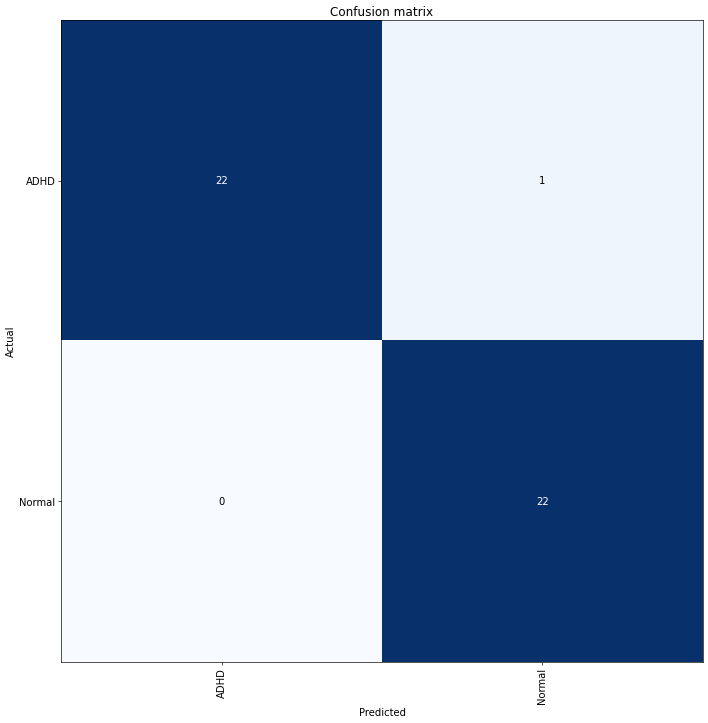

In [46]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [47]:
interp.most_confused(min_val=3)

[]

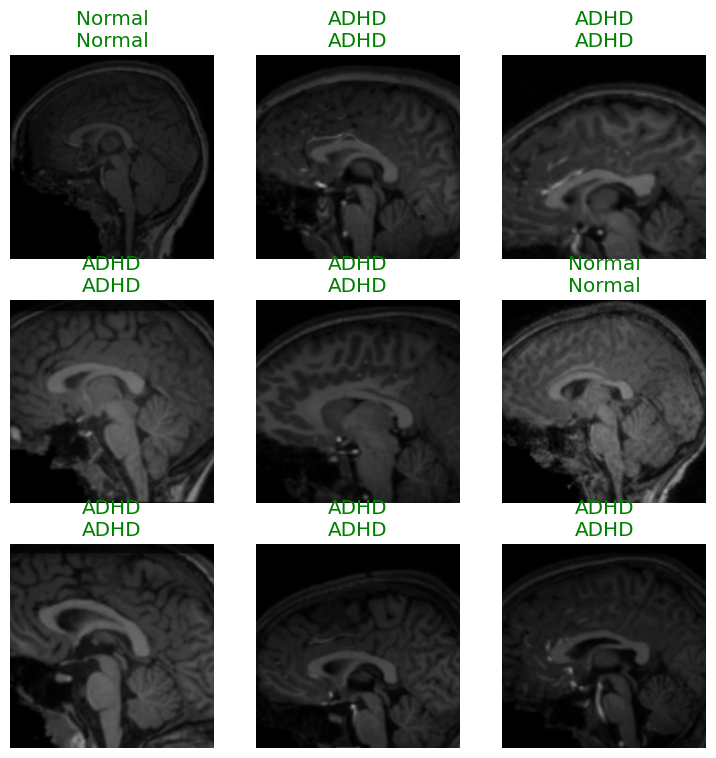

In [48]:
learner.show_results(shuffle=True)

In [49]:
learner.export("Sagittalfind_model_.pkl")

# **Test**

In [50]:
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_inf = load_learner('Axialfind_model_.pkl')

TensorBase(0.8119)


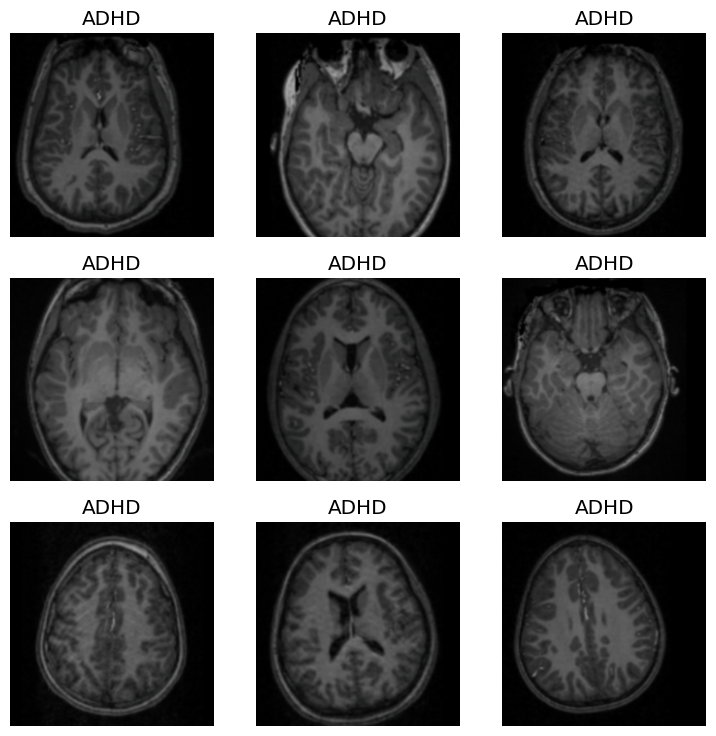

In [51]:
tst_files = get_image_files('alldatas/testaxial')
#print(len(tst_files))
tst_dl = dls.test_dl(tst_files, with_labels=True)
tst_dl.show_batch(max_n=9)
preds, y = learn_inf.get_preds(dl=tst_dl)
acc = accuracy(preds, y)
print(acc)
#acc2 = learn_inf.validate(dl=tst_dl)
#print(acc2)

In [52]:
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_coro = load_learner('Coronalfind_model_.pkl')

TensorBase(0.9600)


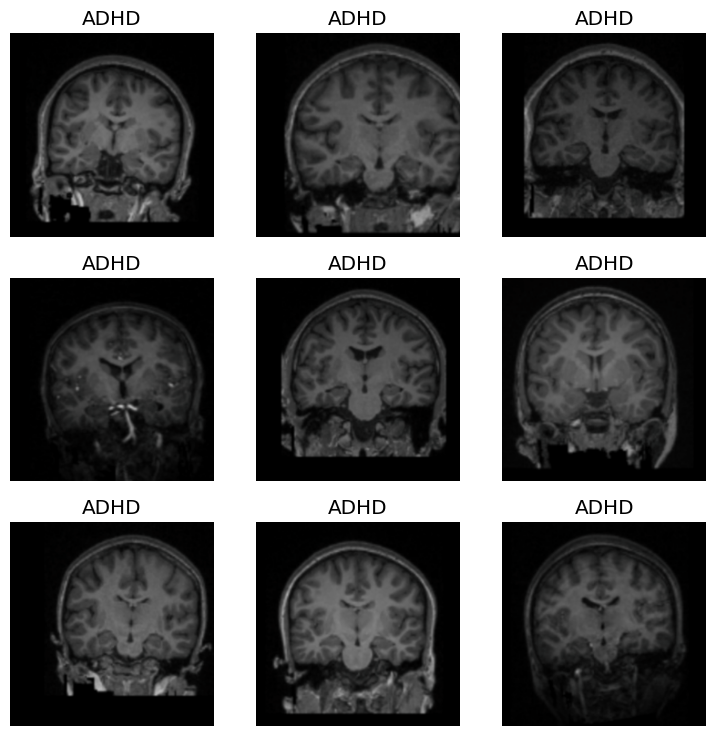

In [53]:
tst_files = get_image_files('alldatas/testcoronal')
#print(len(tst_files))
tst_dl = dls.test_dl(tst_files, with_labels=True)
tst_dl.show_batch(max_n=9)
preds, y = learn_coro.get_preds(dl=tst_dl)
acc = accuracy(preds, y)
print(acc)
#acc2 = learn_inf.validate(dl=tst_dl)
#print(acc2)

In [54]:
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_sagit = load_learner('Sagittalfind_model_.pkl')

TensorBase(0.9200)


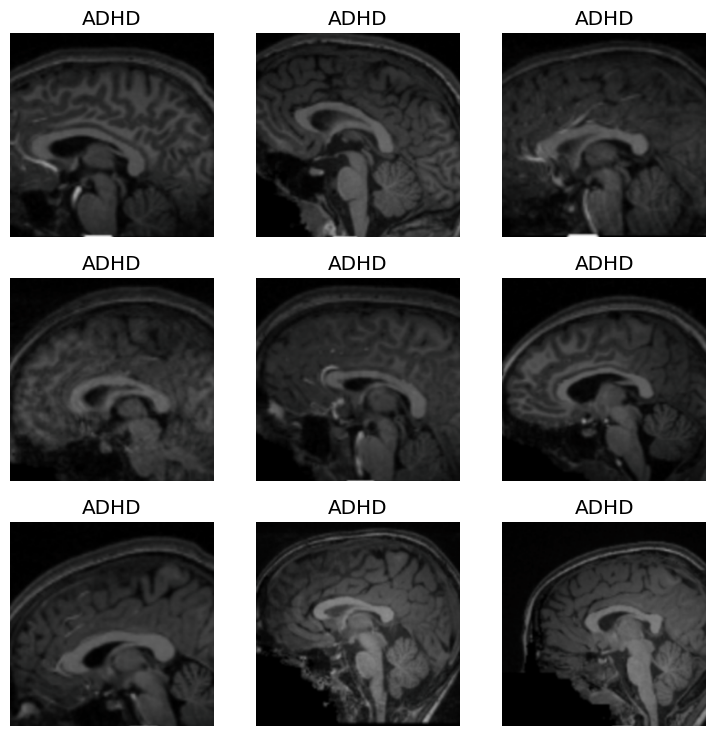

In [55]:
tst_files = get_image_files('alldatas/testsagittal')
#print(len(tst_files))
tst_dl = dls.test_dl(tst_files, with_labels=True)
tst_dl.show_batch(max_n=9)
preds, y = learn_sagit.get_preds(dl=tst_dl)
acc = accuracy(preds, y)
print(acc)
#acc2 = learn_inf.validate(dl=tst_dl)
#print(acc2)

# **Hard voting ++ Finding Accuracy**

ใช้โมเดลหาผลของแต่ละมุม หลังจากนั้นนำค่าความน่าจะเป็นเพื่อใช้ในการ Hard Voting และแสดงผล

In [58]:
from fastai.vision.all import load_learner, PILImage
import os
import re

# Helper function to extract the number from a filename
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(0)) if match else None  # Return None if no number is found

# Load the trained model and make predictions on images in a folder
def predict(model_path, folder, result_list, start=151, end=200):
    # Load the trained model
    model = load_learner(model_path)

    # Get the list of image names in the folder, sorted by numeric part if within the specified range
    img_names = [
        img for img in os.listdir(folder)
        if img.endswith('.png') and (num := extract_number(img)) is not None and start <= num <= end
    ]

    # Sort images by the extracted number to ensure proper order
    img_names.sort(key=extract_number)

    # Print the sorted list of files that will be used for predictions
    print(f"Files used for predictions in {folder}: {img_names}")

    # Loop through each image in the folder in sorted order
    for img_name in img_names:
        # Load each image as a PILImage
        img_path = os.path.join(folder, img_name)
        img = PILImage.create(img_path)

        # Predict the class and get probabilities
        prediction = model.predict(img)
        predicted_class = prediction[0]  # The predicted class label

        # Append the prediction result to the list
        result_list.append(predicted_class)

    print(f"Predictions for {folder}: {result_list}")

# Define lists to hold predictions for each model
axial_list = []
coronal_list = []
sagittal_list = []

# Call the function for each model and folder
predict('Axialfind_model_.pkl', 'alldatas/testaxial/Normal', axial_list)
predict('Coronalfind_model_.pkl', 'alldatas/testcoronal/Normal', coronal_list)
predict('Sagittalfind_model_.pkl', 'alldatas/testsagittal/Normal', sagittal_list)


Files used for predictions in alldatas/testaxial/Normal: ['na151.png', 'na152.png', 'na153.png', 'na154.png', 'na155.png', 'na156.png', 'na157.png', 'na158.png', 'na159.png', 'na160.png', 'na161.png', 'na162.png', 'na163.png', 'na164.png', 'na165.png', 'na166.png', 'na167.png', 'na168.png', 'na169.png', 'na170.png', 'na171.png', 'na172.png', 'na173.png', 'na174.png', 'na175.png', 'na176.png', 'na177.png', 'na178.png', 'na179.png', 'na180.png', 'na181.png', 'na182.png', 'na183.png', 'na184.png', 'na185.png', 'na186.png', 'na187.png', 'na188.png', 'na189.png', 'na190.png', 'na191.png', 'na192.png', 'na193.png', 'na194.png', 'na195.png', 'na196.png', 'na197.png', 'na198.png', 'na199.png', 'na200.png']


Predictions for alldatas/testaxial/Normal: ['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal']
Files used for predictions in alldatas/testcoronal/Normal: ['nc151.png', 'nc152.png', 'nc153.png', 'nc154.png', 'nc155.png', 'nc156.png', 'nc157.png', 'nc158.png', 'nc159.png', 'nc160.png', 'nc161.png', 'nc162.png', 'nc163.png', 'nc164.png', 'nc165.png', 'nc166.png', 'nc167.png', 'nc168.png', 'nc169.png', 'nc170.png', 'nc171.png', 'nc172.png', 'nc173.png', 'nc174.png', 'nc175.png', 'nc176.png', 'nc177.png', 'nc178.png', 'nc179.png', 'nc180.png', 'nc181

Predictions for alldatas/testcoronal/Normal: ['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal']
Files used for predictions in alldatas/testsagittal/Normal: ['ns151.png', 'ns152.png', 'ns153.png', 'ns154.png', 'ns155.png', 'ns156.png', 'ns157.png', 'ns158.png', 'ns159.png', 'ns160.png', 'ns161.png', 'ns162.png', 'ns163.png', 'ns164.png', 'ns165.png', 'ns166.png', 'ns167.png', 'ns168.png', 'ns169.png', 'ns170.png', 'ns171.png', 'ns172.png', 'ns173.png', 'ns174.png', 'ns175.png', 'ns176.png', 'ns177.png', 'ns178.png', 'ns179.png', 'ns180.png', 'ns

Predictions for alldatas/testsagittal/Normal: ['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal']


In [59]:
for i in range(50):
  adhd = 0
  normal = 0
  if (axial_list[i]=='ADHD'):
    adhd += 1
  else:
    normal += 1
  if (coronal_list[i]=='ADHD'):
    adhd += 1
  else:
    normal += 1
  if (sagittal_list[i]=='ADHD'):
    adhd += 1
  else:
    normal += 1
  if (adhd > normal):
    print('ADHD')
  else:
    print('Normal')

Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal


In [88]:

from fastai.vision.all import load_learner, PILImage
import os
import re

# Helper function to extract the number from a filename
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(0)) if match else None  # Return None if no number is found

# Load the trained model and make predictions on images in a folder
def predict(model_path, folder, result_list, start=151, end=200):
    # Load the trained model
    model = load_learner(model_path)

    # Get the list of image names in the folder, sorted by numeric part if within the specified range
    img_names = [
        img for img in os.listdir(folder)
        if img.endswith('.PNG') and (num := extract_number(img)) is not None and start <= num <= end
    ]


    # Sort images by the extracted number to ensure proper order
    img_names.sort(key=extract_number)

    # Print the sorted list of files that will be used for predictions
    print(f"Files used for predictions in {folder}: {img_names}")

    # Loop through each image in the folder in sorted order
    for img_name in img_names:
        # Load each image as a PILImage
        img_path = os.path.join(folder, img_name)
        img = PILImage.create(img_path)

        # Predict the class and get probabilities
        prediction = model.predict(img)
        predicted_class = prediction[0]  # The predicted class label

        # Append the prediction result to the list
        result_list.append(predicted_class)

    print(f"Predictions for {folder}: {result_list}")

# Define lists to hold predictions for each model
axial_list = []
coronal_list = []
sagittal_list = []

# Call the function for each model and folder
predict('Axialfind_model_.pkl', 'alldatas/testaxial/ADHD', axial_list)
predict('Coronalfind_model_.pkl', 'alldatas/testcoronal/ADHD', coronal_list)
predict('Sagittalfind_model_.pkl', 'alldatas/testsagittal/ADHD', sagittal_list)


Files used for predictions in alldatas/testaxial/ADHD: ['aa151.PNG', 'aa152.PNG', 'aa153.PNG', 'aa154.PNG', 'aa155.PNG', 'aa156.PNG', 'aa157.PNG', 'aa158.PNG', 'aa159.PNG', 'aa160.PNG', 'aa161.PNG', 'aa162.PNG', 'aa163.PNG', 'aa164.PNG', 'aa165.PNG', 'aa166.PNG', 'aa167.PNG', 'aa168.PNG', 'aa169.PNG', 'aa170.PNG', 'aa171.PNG', 'aa172.PNG', 'aa173.PNG', 'aa174.PNG', 'aa175.PNG', 'aa176.PNG', 'aa177.PNG', 'aa178.PNG', 'aa179.PNG', 'aa180.PNG', 'aa181.PNG', 'aa182.PNG', 'aa183.PNG', 'aa184.PNG', 'aa185.PNG', 'aa186.PNG', 'aa187.PNG', 'aa188.PNG', 'aa189.PNG', 'aa190.PNG', 'aa191.PNG', 'aa192.PNG', 'aa192 (1).PNG', 'aa193.PNG', 'aa194.PNG', 'aa195.PNG', 'aa196.PNG', 'aa197.PNG', 'aa198.PNG', 'aa199.PNG', 'aa200.PNG']


Predictions for alldatas/testaxial/ADHD: ['Normal', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'Normal', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'Normal', 'Normal', 'Normal', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'Normal', 'ADHD', 'ADHD', 'Normal', 'Normal', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'Normal', 'Normal', 'ADHD', 'ADHD']
Files used for predictions in alldatas/testcoronal/ADHD: ['ac151.PNG', 'ac152.PNG', 'ac153.PNG', 'ac154.PNG', 'ac155.PNG', 'ac156.PNG', 'ac157.PNG', 'ac158.PNG', 'ac159.PNG', 'ac160.PNG', 'ac161.PNG', 'ac162.PNG', 'ac163.PNG', 'ac164.PNG', 'ac165.PNG', 'ac166.PNG', 'ac167.PNG', 'ac168.PNG', 'ac169.PNG', 'ac170.PNG', 'ac171.PNG', 'ac172.PNG', 'ac173.PNG', 'ac174.PNG', 'ac175.PNG', 'ac176.PNG', 'ac177.PNG', 'ac178.PNG', 'ac179.PNG', 'ac180.PNG', 'ac181.PNG', 'ac182.PNG', 'ac183.PNG', 'ac184.PNG', 'ac185.PNG',

Predictions for alldatas/testcoronal/ADHD: ['ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'Normal', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD']
Files used for predictions in alldatas/testsagittal/ADHD: ['as151.PNG', 'as152.PNG', 'as153.PNG', 'as154.PNG', 'as155.PNG', 'as156.PNG', 'as157.PNG', 'as158.PNG', 'as159.PNG', 'as160.PNG', 'as161.PNG', 'as162.PNG', 'as163.PNG', 'as164.PNG', 'as165.PNG', 'as166.PNG', 'as167.PNG', 'as168.PNG', 'as169.PNG', 'as170.PNG', 'as171.PNG', 'as172.PNG', 'as173.PNG', 'as174.PNG', 'as175.PNG', 'as176.PNG', 'as177.PNG', 'as178.PNG', 'as179.PNG', 'as180.PNG', 'as181.PNG', 'as182.PNG', 'as183.PNG', 'as184.PNG', 'as185.PNG', 'as186.PNG', 'as187.PNG', 'as188.P

Predictions for alldatas/testsagittal/ADHD: ['ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'Normal', 'Normal', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'Normal', 'ADHD', 'ADHD', 'ADHD', 'ADHD', 'ADHD']


In [89]:
for i in range(50):
  adhd = 0
  normal = 0
  if (axial_list[i]=='ADHD'):
    adhd += 1
  else:
    normal += 1
  if (coronal_list[i]=='ADHD'):
    adhd += 1
  else:
    normal += 1
  if (sagittal_list[i]=='ADHD'):
    adhd += 1
  else:
    normal += 1
  if (adhd > normal):
    print('ADHD')
  else:
    print('Normal')

ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
Normal
ADHD
ADHD
ADHD
ADHD
Normal
ADHD
Normal
ADHD
ADHD
Normal
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
Normal
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
Normal
Normal
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
ADHD
